In [11]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# Dados do exercício
idade = np.array([2, 6, 1, 4, 3, 5])
horas_operacao = np.array([50, 200, 20, 150, 100, 180])
historico_falhas = np.array(['Nenhuma', '2', 'Nenhuma', '1', '3', '2'])
classificacao = np.array(['Necessita', 'Necessita', 'Necessita', 'Não Necessita', 'Necessita', 'Não Necessita'])

In [13]:
# Converter histórico de falhas para numérico
historico_falhas_num = np.array([0 if x == 'Nenhuma' else int(x) for x in historico_falhas])

In [14]:
# Preparar features (X) e target (y)
X = np.column_stack((idade, horas_operacao, historico_falhas_num))
y = classificacao

print("="*60)
print("EXERCÍCIO 5 - MANUTENÇÃO PREVENTIVA DE MÁQUINAS")
print("="*60)
print("\nDados do problema:")
print(f"Total de máquinas: {len(idade)}")
print(f"Features: Idade, Horas de Operação, Histórico de Falhas")
print(f"Classes: Necessita / Não Necessita Manutenção\n")

EXERCÍCIO 5 - MANUTENÇÃO PREVENTIVA DE MÁQUINAS

Dados do problema:
Total de máquinas: 6
Features: Idade, Horas de Operação, Histórico de Falhas
Classes: Necessita / Não Necessita Manutenção



In [15]:
# Dividir dados em treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(
    X, y, test_size=0.3, random_state=42
)

print(f"Dados de treino: {len(X_treino)} máquinas")
print(f"Dados de teste: {len(X_teste)} máquinas\n")

Dados de treino: 4 máquinas
Dados de teste: 2 máquinas



In [16]:
# Criar e treinar o modelo
modelo = DecisionTreeClassifier(random_state=42)
modelo.fit(X_treino, y_treino)

DecisionTreeClassifier(random_state=42)

In [17]:
# Fazer previsões
previsoes = modelo.predict(X_teste)

In [18]:
# Calcular acurácia
acuracia = accuracy_score(y_teste, previsoes)
print("="*60)
print(f"ACURÁCIA DO MODELO: {acuracia:.2%}")
print("="*60)

ACURÁCIA DO MODELO: 50.00%


In [19]:
# Exibir resultados dos testes
print("\nResultados das Previsões:")
print("-"*60)
for i, (real, pred) in enumerate(zip(y_teste, previsoes)):
    status = "✓ CORRETO" if real == pred else "✗ INCORRETO"
    print(f"Teste {i+1}: Real={real:20s} | Previsto={pred:20s} | {status}")


Resultados das Previsões:
------------------------------------------------------------
Teste 1: Real=Necessita            | Previsto=Necessita            | ✓ CORRETO
Teste 2: Real=Necessita            | Previsto=Não Necessita        | ✗ INCORRETO


In [20]:
# Matriz de confusão
print("\n" + "="*60)
print("MATRIZ DE CONFUSÃO")
print("="*60)
cm = confusion_matrix(y_teste, previsoes, labels=['Necessita', 'Não Necessita'])
print(cm)


MATRIZ DE CONFUSÃO
[[1 1]
 [0 0]]


In [21]:
# Relatório de classificação
print("\n" + "="*60)
print("RELATÓRIO DE CLASSIFICAÇÃO")
print("="*60)
print(classification_report(y_teste, previsoes, target_names=['Necessita', 'Não Necessita']))


RELATÓRIO DE CLASSIFICAÇÃO
               precision    recall  f1-score   support

    Necessita       1.00      0.50      0.67         2
Não Necessita       0.00      0.00      0.00         0

     accuracy                           0.50         2
    macro avg       0.50      0.25      0.33         2
 weighted avg       1.00      0.50      0.67         2



C:\Users\dsadm\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\dsadm\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\dsadm\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


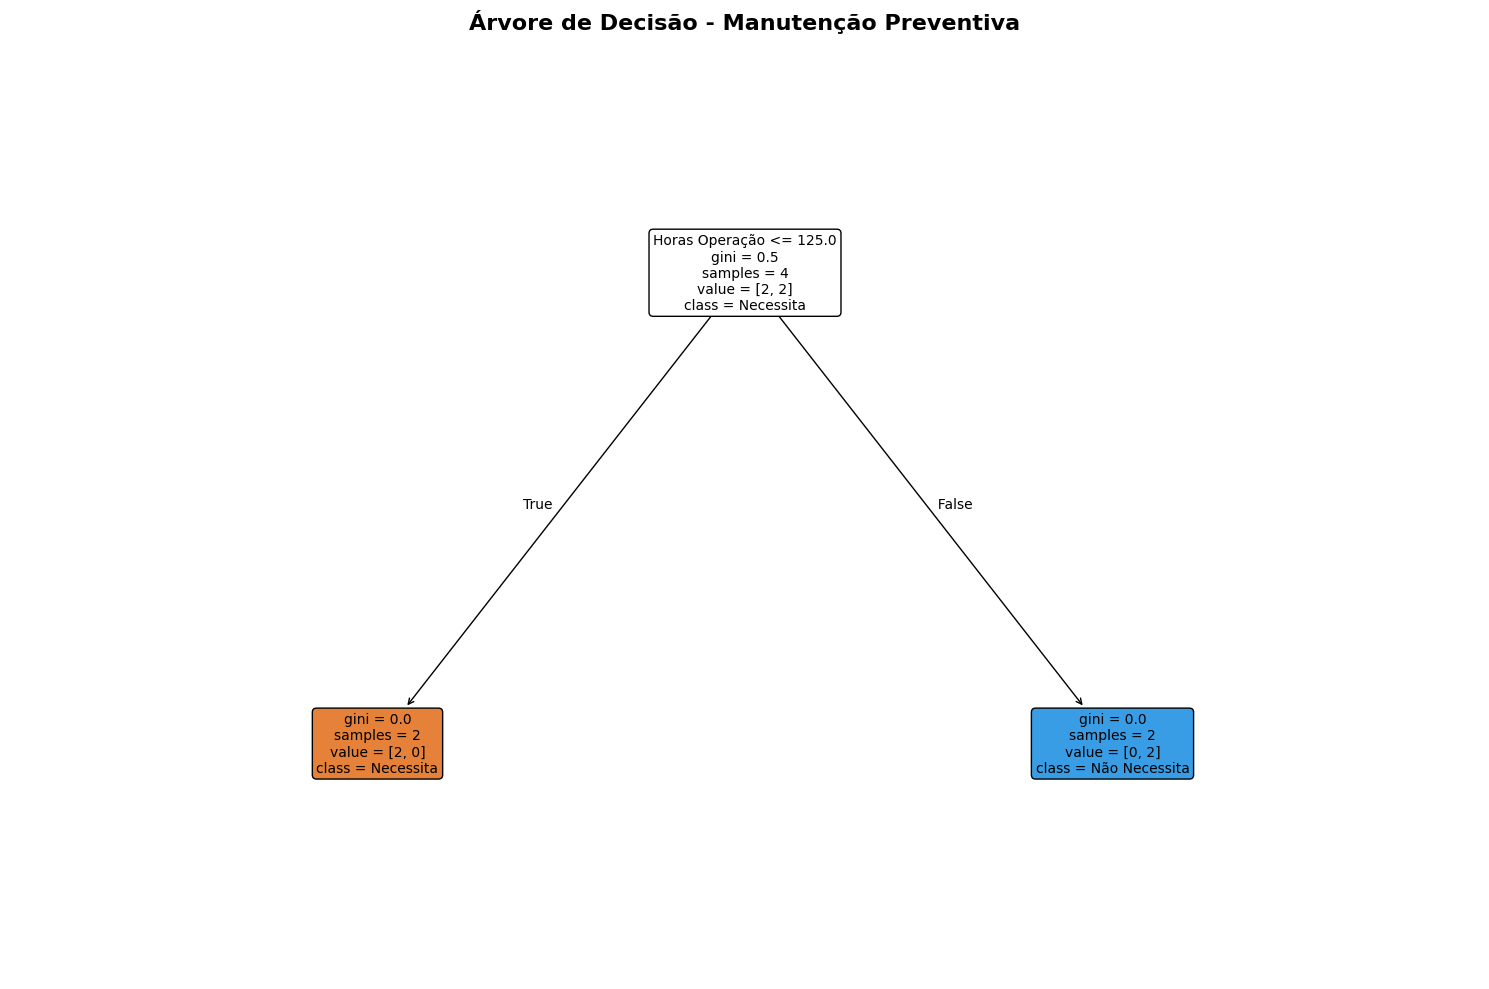

In [22]:
# Visualizar a árvore de decisão
plt.figure(figsize=(15, 10))
tree.plot_tree(modelo, 
               feature_names=['Idade', 'Horas Operação', 'Histórico Falhas'],
               class_names=['Necessita', 'Não Necessita'],
               filled=True,
               rounded=True,
               fontsize=10)
plt.title('Árvore de Decisão - Manutenção Preventiva', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

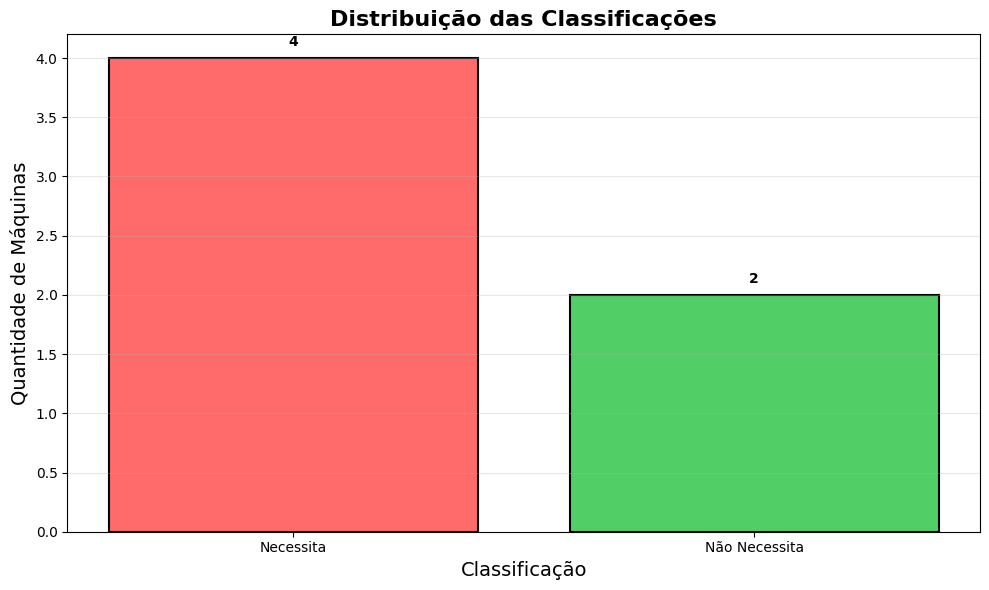

In [23]:
# Gráfico de barras - Distribuição das classes
plt.figure(figsize=(10, 6))
classes_unicas, contagens = np.unique(classificacao, return_counts=True)
plt.bar(classes_unicas, contagens, color=['#ff6b6b', '#51cf66'], edgecolor='black', linewidth=1.5)
plt.title('Distribuição das Classificações', fontsize=16, fontweight='bold')
plt.xlabel('Classificação', fontsize=14)
plt.ylabel('Quantidade de Máquinas', fontsize=14)
plt.grid(axis='y', alpha=0.3)
for i, v in enumerate(contagens):
    plt.text(i, v + 0.1, str(v), ha='center', fontweight='bold')
plt.tight_layout()
plt.show()

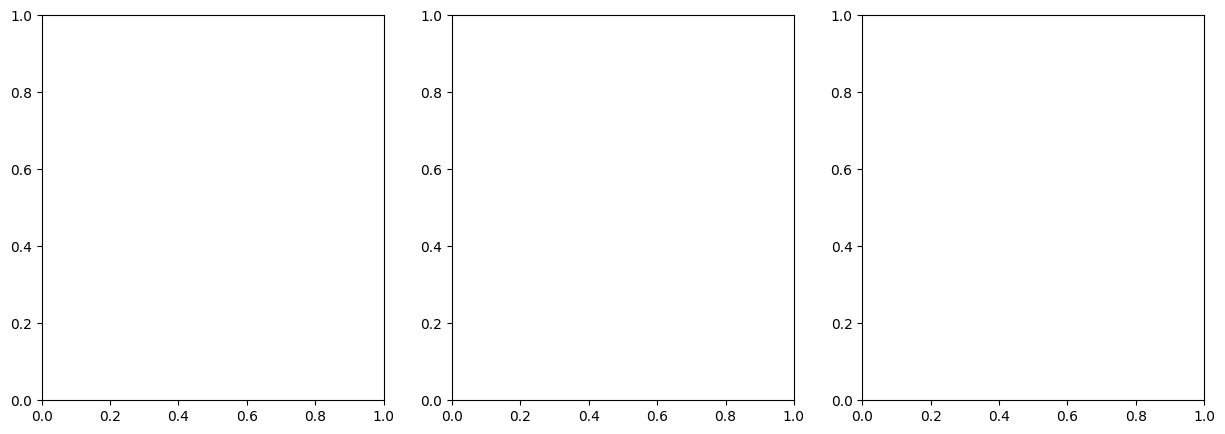

In [24]:
# Boxplot das features
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

In [25]:
# Boxplot Idade
sns.boxplot(x=classificacao, y=idade, ax=axes[0], palette=['#ff6b6b', '#51cf66'])
axes[0].set_title('Idade das Máquinas por Classificação', fontweight='bold')
axes[0].set_xlabel('Classificação')
axes[0].set_ylabel('Idade (anos)')

C:\Users\dsadm\AppData\Local\Temp\ipykernel_22888\2310103061.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=classificacao, y=idade, ax=axes[0], palette=['#ff6b6b', '#51cf66'])


Text(4.444444444444452, 0.5, 'Idade (anos)')

In [26]:
# Boxplot Horas de Operação
sns.boxplot(x=classificacao, y=horas_operacao, ax=axes[1], palette=['#ff6b6b', '#51cf66'])
axes[1].set_title('Horas de Operação por Classificação', fontweight='bold')
axes[1].set_xlabel('Classificação')
axes[1].set_ylabel('Horas')

C:\Users\dsadm\AppData\Local\Temp\ipykernel_22888\293724118.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=classificacao, y=horas_operacao, ax=axes[1], palette=['#ff6b6b', '#51cf66'])


Text(414.73856209150335, 0.5, 'Horas')

In [27]:
# Boxplot Histórico de Falhas
sns.boxplot(x=classificacao, y=historico_falhas_num, ax=axes[2], palette=['#ff6b6b', '#51cf66'])
axes[2].set_title('Histórico de Falhas por Classificação', fontweight='bold')
axes[2].set_xlabel('Classificação')
axes[2].set_ylabel('Número de Falhas')

plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("EXERCÍCIO CONCLUÍDO!")
print("="*60)

C:\Users\dsadm\AppData\Local\Temp\ipykernel_22888\3831178105.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=classificacao, y=historico_falhas_num, ax=axes[2], palette=['#ff6b6b', '#51cf66'])


<Figure size 640x480 with 0 Axes>


EXERCÍCIO CONCLUÍDO!
